# 1 Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Riley\Desktop\Data Any\DD-MM-2022-Instacart Basket Analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', '4.3_orders_products', 'ords_prods_cust(4.9).pkl'))

In [6]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,exists
0,-16575,1,prior,1,2,8,NaN,196.0,1,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,-16575,1,prior,1,2,8,NaN,14084.0,2,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,-16575,1,prior,1,2,8,NaN,12427.0,3,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,-16575,1,prior,1,2,8,NaN,26088.0,4,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,-16575,1,prior,1,2,8,NaN,26405.0,5,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
df.shape

(32641268, 31)

# 2 Security Concerns

This data set includes multiple instances of PII, in order to preserve the customers privacy I will need to remove the first and last name columns.

In [8]:
df_secure = df.drop(columns = ['first_name', 'surname'])

In [9]:
df_secure.head(5)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,exists
0,-16575,1,prior,1,2,8,NaN,196.0,1,0.0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,-16575,1,prior,1,2,8,NaN,14084.0,2,0.0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,-16575,1,prior,1,2,8,NaN,12427.0,3,0.0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,-16575,1,prior,1,2,8,NaN,26088.0,4,0.0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,-16575,1,prior,1,2,8,NaN,26405.0,5,0.0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


# 3 Regional Segmentaion

In [10]:
df_secure['state'].value_counts(dropna = False)

Pennsylvania            671781
California              664472
Rhode Island            661705
Georgia                 661136
New Mexico              659231
Arizona                 658597
North Carolina          656372
Oklahoma                656318
Alaska                  653070
Minnesota               652467
Massachusetts           651063
Wyoming                 648970
Virginia                646146
Missouri                645366
Texas                   645094
Colorado                643864
Maine                   643218
North Dakota            643040
Alabama                 642694
Louisiana               642222
Kansas                  642064
Delaware                641521
South Carolina          641466
Oregon                  641009
Arkansas                640781
New York                640750
Nevada                  640740
Montana                 639881
South Dakota            638405
Illinois                637520
Hawaii                  637490
Washington              637488
Mississi

In [11]:
#  Create Region List

result = []

for value in df_secure['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value == 'New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        result.append('Midwest')
    elif (value == 'Delaware') or (value == 'Maryland') or (value == 'District of Columbia') or (value == 'Virginia') or (value == 'West Virginia') or (value == 'North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value == 'Florida') or (value == 'Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):
        result.append('South')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        result.append('West')

In [12]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'We

In [13]:
# Add Region Column
df_secure['region'] = result

In [14]:
df_secure['region'].head(5)

0    South
1    South
2    South
3    South
4    South
Name: region, dtype: object

In [15]:
df_secure['region'].value_counts(dropna = False)

South        10870719
West          8353182
Midwest       7652535
Northeast     5764832
Name: region, dtype: int64

In [16]:
# Spending Habits Analysis
crosstab = pd.crosstab(df_secure['region'], df_secure['spending_flag'], dropna = False)

In [17]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,157347,7495188
Northeast,109159,5655673
South,211695,10659024
West,161834,8191348


In [18]:
# Percentage Calculation
MW = (157347 / (157347 + 7495188)) * 100
NE = (109159 / (109159 + 5655673)) * 100
S = (211695 / (211695 + 10659024)) * 100
W = (161834 / (161834 + 8191348)) * 100

In [19]:
MW

2.05614218033632

In [20]:
NE

1.8935330639297037

In [21]:
S

1.9473872887340755

In [22]:
W

1.9373934388117007

These calculations show us that about 2% of each region can be considered high spenders.

# 4 Low Activity Exclusion Flag

In [23]:
df_secure.loc[df_secure['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [24]:
df_secure.loc[df_secure['max_order'] >= 5, 'exclusion_flag'] = 'Normal activity customer'

In [25]:
df_secure['exclusion_flag'].value_counts(dropna = False)

Normal activity customer    31929979
Low activity customer         711289
Name: exclusion_flag, dtype: int64

In [26]:
# Low Activity Data 
df_low_activity = df_secure[df_secure['exclusion_flag'] == 'Low activity customer']

In [27]:
df_low_activity['max_order'].value_counts(dropna = False)

4    711289
Name: max_order, dtype: int64

In [28]:
# Normal Activity Data
df_normal_activity = df_secure[df_secure['exclusion_flag'] == 'Normal activity customer']

In [29]:
df_normal_activity['max_order'].value_counts(dropna = False)

100    1173687
7       825922
9       822821
10      819874
8       816445
        ...   
94       50497
91       48455
98       45019
99       44651
97       40523
Name: max_order, Length: 96, dtype: int64

In [30]:
df_normal_activity.to_pickle(os.path.join(path, '02 Data', '4.3_orders_products', 'ords_prods_normal_activity.pkl'))

# 5 Customer Profiling

In [31]:
# Age Variable
df_secure['age'].value_counts().sort_index()

18    504085
19    523536
20    506558
21    516217
22    517624
       ...  
77    505908
78    498941
79    533539
80    518854
81    513068
Name: age, Length: 64, dtype: int64

In [32]:
df_secure['age'].describe()

count    3.264127e+07
mean     4.946535e+01
std      1.848552e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [33]:
age_profile_list = []

for value in df_secure['age']:
    if (value >= 18) and (value <= 24):
        age_profile_list.append('18-24')
    elif (value >= 25) and (value <= 34):
        age_profile_list.append('25-34')
    elif (value >= 35) and (value <= 44):
        age_profile_list.append('35-44')
    elif (value >= 45) and (value <= 54):
        age_profile_list.append('45-54')
    elif (value >= 55) and (value <= 64):
        age_profile_list.append('55-64')
    elif (value >= 65) and (value <= 74):
        age_profile_list.append('65-74')
    elif (value >= 75) and (value <= 84):
        age_profile_list.append('75-84')
    elif (value >= 85):
        age_profile_list.append('85+')

In [34]:
# New Column for Age List

df_secure['age_profile'] = age_profile_list

In [35]:
df_secure['age_profile'].value_counts().sort_index()

18-24    3598969
25-34    5091602
35-44    5099010
45-54    5148479
55-64    5065670
65-74    5041363
75-84    3596175
Name: age_profile, dtype: int64

In [36]:
# Income Variable
df_secure['income'].value_counts().sort_index()

25903      21
25911      29
25937      40
25941      32
25955     393
         ... 
584097    827
590790     55
591089    177
592409    319
593901    641
Name: income, Length: 108012, dtype: int64

In [37]:
df_secure['income'].describe()

count    3.264127e+07
mean     9.940516e+04
std      4.305343e+04
min      2.590300e+04
25%      6.697900e+04
50%      9.659500e+04
75%      1.278650e+05
max      5.939010e+05
Name: income, dtype: float64

In [38]:
income_profile_list = []

for value in df_secure['income']:
    if value < 25000:
        income_profile_list.append('0-25000')
    elif (value >= 25000) and (value <= 50000):
        income_profile_list.append('25000-50000')
    elif (value >= 50000) and (value <= 75000):
        income_profile_list.append('50000-75000')
    elif (value >= 75000) and (value <= 100000):
        income_profile_list.append('75000-100000')
    elif (value >= 100000) and (value <= 125000):
        income_profile_list.append('100000-125000')
    elif (value >= 125000) and (value <= 150000):
        income_profile_list.append('125000-150000')
    elif (value >= 150000) and (value <= 175000):
        income_profile_list.append('150000-175000')
    elif (value >= 175000) and (value <= 200000):
        income_profile_list.append('175000-200000')
    elif (value >= 200000) and (value <= 300000):
        income_profile_list.append('200000-300000')
    elif (value >= 300000) and (value <= 400000):
        income_profile_list.append('300000-400000')
    elif (value >= 400000) and (value <= 500000):
        income_profile_list.append('400000-500000')
    elif value >= 500000:
        income_profile_list.append('500000+')

In [39]:
# New Column for Income List
df_secure['income_profile'] = income_profile_list

In [40]:
df_secure['income_profile'].value_counts()

75000-100000     7196797
50000-75000      6897988
100000-125000    6224991
125000-150000    4611695
150000-175000    3768986
25000-50000      3632050
200000-300000     157595
300000-400000      54178
175000-200000      49110
400000-500000      28452
500000+            19426
Name: income_profile, dtype: int64

In [41]:
# Certain Goods Variable
df_secure['department_id'].value_counts().sort_index()

0      236409
1     2234743
2       36291
3     1172428
4     9479291
5      153696
6      269253
7     2688123
8       97716
9      866627
10      34573
11     447572
12     708927
13    1875369
14     703033
15    1068058
16    5398747
17     738666
18     423802
19    2887550
20    1051249
21      69145
Name: department_id, dtype: int64

In [42]:
goods_profile_list = []

for value in df_secure['department_id']:
    if value == 1:
        goods_profile_list.append('Frozen')
    elif value == 2:
        goods_profile_list.append('Other')
    elif value == 3:
        goods_profile_list.append('Bakery')
    elif value == 4:
        goods_profile_list.append('Produce')
    elif value == 5:
        goods_profile_list.append('Alcohol')
    elif value == 6:
        goods_profile_list.append('International')
    elif value == 7:
        goods_profile_list.append('Beverages')
    elif value == 8:
        goods_profile_list.append('Pets')
    elif value == 9:
        goods_profile_list.append('Dry goods pasta')
    elif value == 10:
        goods_profile_list.append('Bulk')
    elif value == 11:
        goods_profile_list.append('Personal care')
    elif value == 12:
        goods_profile_list.append('Meat seafood')
    elif value == 13:
        goods_profile_list.append('Pantry')
    elif value == 14:
        goods_profile_list.append('Breakfast')
    elif value == 15:
        goods_profile_list.append('Canned goods')
    elif value == 16:
        goods_profile_list.append('Dairy eggs')
    elif value == 17:
        goods_profile_list.append('Household')
    elif value == 18:
        goods_profile_list.append('Babies')
    elif value == 19:
        goods_profile_list.append('Snacks')
    elif value == 20:
        goods_profile_list.append('Deli')
    elif value == 21:
        goods_profile_list.append('Missing')

In [49]:
# Run as pd to avoid value error
df_secure['goods_profile'] = pd.Series(goods_profile_list)

In [51]:
df_secure['goods_profile'].value_counts()

Produce            9479291
Dairy eggs         5398747
Snacks             2887550
Beverages          2688123
Frozen             2234743
Pantry             1875369
Bakery             1172428
Canned goods       1068058
Deli               1051249
Dry goods pasta     866627
Household           738666
Meat seafood        708927
Breakfast           703033
Personal care       447572
Babies              423802
International       269253
Alcohol             153696
Pets                 97716
Missing              69145
Other                36291
Bulk                 34573
Name: goods_profile, dtype: int64

In [ ]:
# Dependents Variable

In [52]:
df_secure['n_dependants'].value_counts().sort_index()

0    8156947
1    8139996
2    8150216
3    8194109
Name: n_dependants, dtype: int64

In [53]:
dependents_profile_list = []

for value in df_secure['n_dependants']:
    if value == 0:
        dependents_profile_list.append('Non-parent')
    else:
        dependents_profile_list.append('Parent')

In [54]:
df_secure['dependents_profile'] = dependents_profile_list

In [55]:
df_secure['dependents_profile'].value_counts()

Parent        24484321
Non-parent     8156947
Name: dependents_profile, dtype: int64

# 6 Profile Visualizations

In [77]:
df_secure['age_profile'].value_counts().sort_index()

18-24    3598969
25-34    5091602
35-44    5099010
45-54    5148479
55-64    5065670
65-74    5041363
75-84    3596175
Name: age_profile, dtype: int64

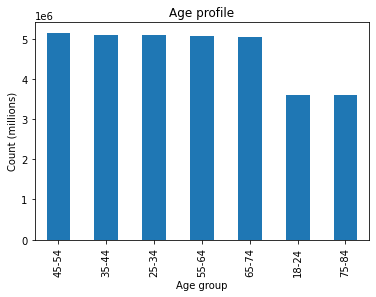

In [78]:
# Age Profile
age_chart = df_secure['age_profile'].value_counts().plot.bar(color = 'tab:blue', xlabel = 'Age group', ylabel = 'Count (millions)', title = 'Age profile')

In [79]:
age_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile.png'))

In [80]:
# Income Profile

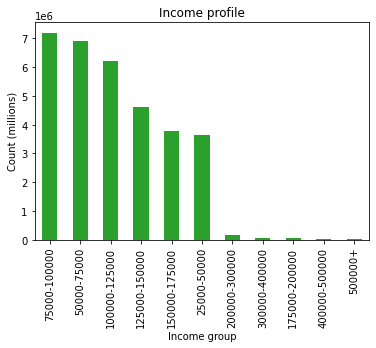

In [81]:
income_chart = df_secure['income_profile'].value_counts().plot.bar(color = 'tab:green', xlabel = 'Income group', ylabel = 'Count (millions)', title = 'Income profile')

In [82]:
income_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile.png'))

In [83]:
# Goods Profile

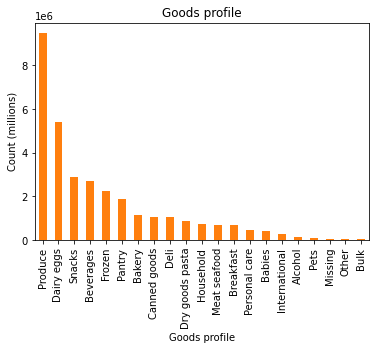

In [84]:
goods_chart = df_secure['goods_profile'].value_counts().plot.bar(color = 'tab:orange', xlabel = 'Goods profile', ylabel = 'Count (millions)', title = 'Goods profile')

In [85]:
goods_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'goods_profile.png'))

In [86]:
# Dependents Profile

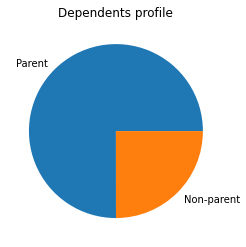

In [87]:
dependents_chart = df_secure['dependents_profile'].value_counts().plot.pie(title = 'Dependents profile', ylabel='')

In [88]:
dependents_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_profile.png'))

# 8 Regional Comparison for Customers

In [89]:
region_spending_crosstab = pd.crosstab(df_secure['region'], df_secure['spending_flag'], dropna = False)

In [90]:
region_spending_crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,157347,7495188
Northeast,109159,5655673
South,211695,10659024
West,161834,8191348


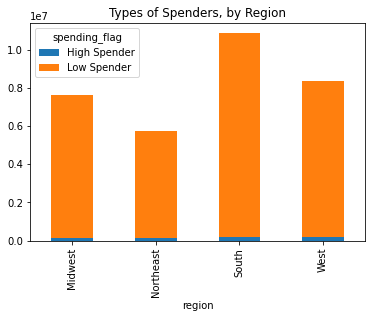

In [91]:
region_spending_chart = region_spending_crosstab.plot.bar(stacked = True, title = 'Types of Spenders, by Region')

In [92]:
region_spending_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_chart.png'))

# 10

In [93]:
df_secure.to_pickle(os.path.join(path, '02 Data', '4.3_orders_products', '4.10 Data Set.pkl'))